# Predict CTR
What I want to do is maximize the CTR for data that includes title strings and demographic information.

The goal is to create a simple model that is highly accurate, has low maintenance costs, and is easy to expand in the future.

## Dataset
[MIND-small](https://msnews.github.io/)

## Preparation

In [2]:
!ls

MINDsmall_dev.zip   MINDsmall_train.zip Untitled.ipynb


In [3]:
!mkdir MINDsmall_train MINDsmall_dev

mkdir: MINDsmall_train: File exists
mkdir: MINDsmall_dev: File exists


In [4]:
!unzip MINDsmall_train.zip -d MINDsmall_train

Archive:  MINDsmall_train.zip
  inflating: MINDsmall_train/entity_embedding.vec  
  inflating: MINDsmall_train/news.tsv  
  inflating: MINDsmall_train/relation_embedding.vec  
  inflating: MINDsmall_train/behaviors.tsv  


In [5]:
!unzip MINDsmall_dev.zip -d MINDsmall_dev

Archive:  MINDsmall_dev.zip
  inflating: MINDsmall_dev/behaviors.tsv  
  inflating: MINDsmall_dev/entity_embedding.vec  
  inflating: MINDsmall_dev/news.tsv  
  inflating: MINDsmall_dev/relation_embedding.vec  


In [ ]:
# pip install sentence-transformers lightgbm pandas tqdm scikit-learn tables　pycaret

## Experiments

### Common Data

In [46]:
news_path = "MINDsmall_train/news.tsv"
behaviors_path = "MINDsmall_train/behaviors.tsv"

news_cols = ["id", "cat", "subcat", "title", "abstract", "url", "title_entities", "abstract_entities"]
behaviors_cols = ["imp_id", "user_id", "time", "history", "impressions"]

news = pd.read_table(news_path, names=news_cols)
behaviors = pd.read_table(behaviors_path, names=behaviors_cols)

In [47]:
news

,id,cat,subcat,title,abstract,url,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
...,...,...,...,...,...,...,...,...
51277,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,https://assets.msn.com/labs/mind/BBWzQJK.html,"[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid...","[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid..."
51278,N47585,lifestyle,lifestylefamily,Family says 13-year-old Broadway star died fro...,NaN,https://assets.msn.com/labs/mind/BBWzQYV.html,"[{""Label"": ""Broadway theatre"", ""Type"": ""F"", ""W...",[]
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...",https://assets.msn.com/labs/mind/BBWzQnK.html,[],[]
51280,N34418,sports,soccer_epl,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...",https://assets.msn.com/labs/mind/BBWzQuK.html,"[{""Label"": ""MLS Cup"", ""Type"": ""U"", ""WikidataId...",[]


In [48]:
behaviors

,imp_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
...,...,...,...,...,...
156960,156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156961,156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156962,156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156963,156964,U44625,11/13/2019 2:57:02 PM,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...


In [27]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from pycaret.classification import *
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from tqdm import tqdm
tqdm.pandas()

### Simplest models (Baseline)

In [49]:
### CTRラベル整形

In [63]:
# インプレッションデータを分解してCTR形式に変換
def parse_impressions(row):
    user_id = row["user_id"]
    imp_id = row["imp_id"]
    pairs = row["impressions"].split()
    data = []
    for pair in pairs:
        nid, label = pair.split("-")
        data.append({
            "imp_id": imp_id,
            "user_id": user_id,
            "news_id": nid,
            "label": int(label)
        })
    return data

ctr_rows = []
for _, row in behaviors.iterrows():
    ctr_rows.extend(parse_impressions(row))

ctr_df = pd.DataFrame(ctr_rows)
len(ctr_df)

5843444

In [64]:
ctr_df

,imp_id,user_id,news_id,label
0,1,U13740,N55689,1
1,1,U13740,N35729,0
2,2,U91836,N20678,0
3,2,U91836,N39317,0
4,2,U91836,N58114,0
...,...,...,...,...
5843439,156964,U44625,N39317,0
5843440,156965,U64800,N61233,0
5843441,156965,U64800,N33828,1
5843442,156965,U64800,N19661,0


In [65]:
### 特徴量マージ

In [72]:
# ニュース情報マージ
merged_df = ctr_df.merge(news, left_on="news_id", right_on="id", how="left")

# 不要なカラム削除、順序整理
merged_df = merged_df.drop(columns=["imp_id", "id", "news_id", "url", "title_entities", "abstract_entities"])
merged_df = merged_df.dropna(subset=["label"])  # labelが欠損してたら除外

In [73]:
merged_df

,user_id,label,cat,subcat,title,abstract
0,U13740,1,sports,football_nfl,"Charles Rogers, former Michigan State football...","Charles Rogers, the former Michigan State foot..."
1,U13740,0,news,newsus,Porsche launches into second story of New Jers...,The Porsche went airborne off a median in Toms...
2,U91836,0,sports,more_sports,Bode Miller delivered his twin boys after midw...,Bode Miller added yet another impressive title...
3,U91836,0,news,newspolitics,"Senior Trump official embellished résumé, had ...",State Dept. official Mina Chang claimed to be ...
4,U91836,0,autos,autosnews,2020 Ford Explorer launch hardly went accordin...,NaN
...,...,...,...,...,...,...
5843439,U44625,0,news,newspolitics,"Senior Trump official embellished résumé, had ...",State Dept. official Mina Chang claimed to be ...
5843440,U64800,0,weather,weathertopstories,Nor'easter to grind at US East Coast this weekend,"High winds, heavy surf and drenching rain will..."
5843441,U64800,1,movies,movienews,Dwayne Johnson Announces 'Black Adam' 2021 Rel...,"The New Line movie, Black Adam, based on the D..."
5843442,U64800,0,news,newscrime,"Judge calls USC dad a 'thief,' gives longest p...","Toby MacFarlane, a California real estate exec..."


In [81]:
merged_df['label'].value_counts()

label
0    5607100
1     236344
Name: count, dtype: int64

In [74]:
### PyCaretでモデル比較

In [82]:
small_merged_df = merged_df.sample(100000, random_state=42)
small_merged_df['label'].value_counts()

label
0    95976
1     4024
Name: count, dtype: int64

In [85]:
clf = setup(
    small_merged_df, 
    target="label", 
    categorical_features=[],
    ignore_features=["imp_id", "id", "news_id", "url", "title_entities", "abstract_entities"],
    session_id=42, 
    verbose=False
)

best_model = compare_models(sort="AUC") 

# print dashboard
evaluate_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9511,0.6508,0.0142,0.0592,0.0229,0.0073,0.0094,0.1330
svm,SVM - Linear Kernel,0.9567,0.6449,0.0060,0.1019,0.0109,0.0047,0.0114,0.1330
ridge,Ridge Classifier,0.9510,0.6388,0.0124,0.0517,0.0200,0.0044,0.0056,0.1240
lda,Linear Discriminant Analysis,0.9303,0.6374,0.0362,0.0452,0.0402,0.0045,0.0045,0.1420
nb,Naive Bayes,0.7481,0.6336,0.4452,0.0748,0.1263,0.0619,0.0957,0.1310
ada,Ada Boost Classifier,0.9445,0.6291,0.0295,0.0672,0.0409,0.0169,0.0184,0.3720
qda,Quadratic Discriminant Analysis,0.3965,0.5757,0.6677,0.0466,0.0850,0.0115,0.0253,0.1310
lightgbm,Light Gradient Boosting Machine,0.9431,0.5709,0.0291,0.0618,0.0395,0.0141,0.0152,0.3890
gbc,Gradient Boosting Classifier,0.9436,0.5579,0.0280,0.0616,0.0385,0.0136,0.0148,0.9500
rf,Random Forest Classifier,0.9415,0.5483,0.0337,0.0648,0.0443,0.0172,0.0182,0.5010


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [86]:
# promising models
selected_models = ['lr', 'nb', 'qda', 'lightgbm']

clf = setup(
    merged_df, 
    target="label", 
    categorical_features=[],
    ignore_features=["imp_id", "id", "news_id", "url", "title_entities", "abstract_entities"],
    session_id=42, 
    verbose=False
)

best_model = compare_models(include=selected_models, sort="AUC")

# print dashboard
evaluate_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9593,0.6991,0.0066,0.3457,0.0129,0.0114,0.0429,16.3850
lr,Logistic Regression,0.9585,0.6919,0.0208,0.3118,0.0390,0.0342,0.0717,15.8070
nb,Naive Bayes,0.8311,0.6489,0.3310,0.1008,0.1492,0.0941,0.1118,13.5260
qda,Quadratic Discriminant Analysis,0.7016,0.6356,0.4843,0.0716,0.1232,0.0572,0.0900,36.1810


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

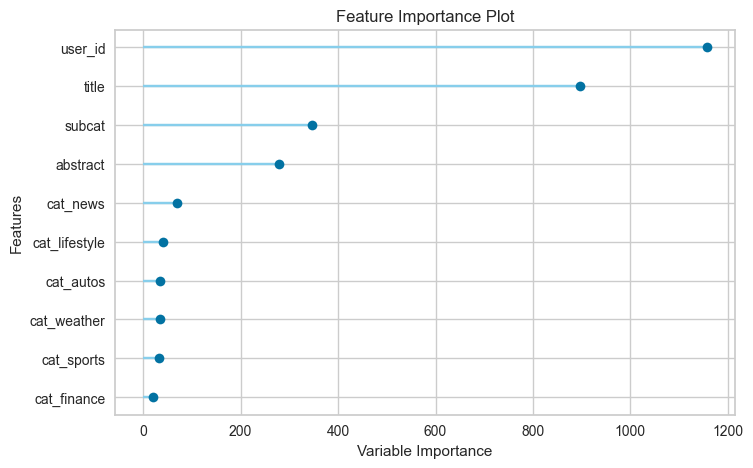

In [87]:
plot_model(best_model, plot='feature')

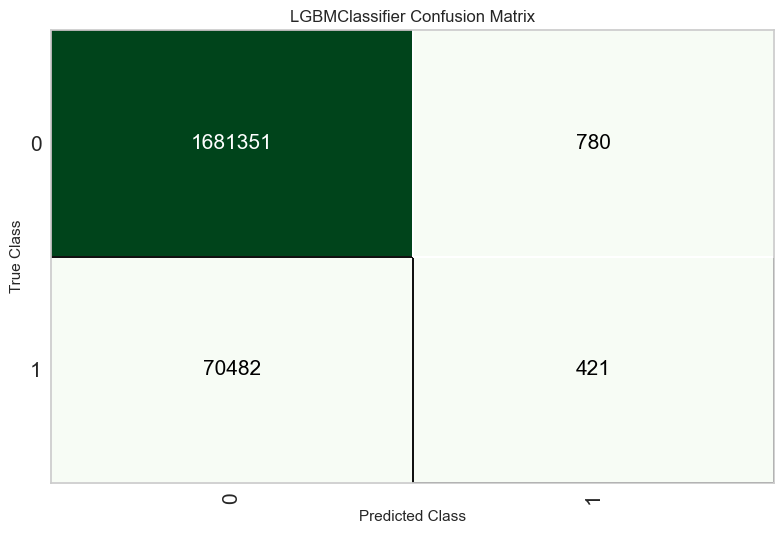

In [88]:
plot_model(best_model, plot='confusion_matrix')

### E5-base vectored title + other features -> LightGBM
E5-baseでベクトル化 → HDF5保存

HDF5を使うことで部分読み込みができるようになり、省メモリ化でき30G+ -> 20G。しかしまだ足りなかったのでデータを分割しバッチ学習に変更することで10G-まで減らせた。

In [ ]:
### E5でベクトル化 → HDF5保存

In [ ]:
# モデル読み込み（例：E5-base）
embedder = SentenceTransformer("intfloat/e5-base")

# タイトルをE5ベクトル化
embeddings = embedder.encode(
    ["query: " + t for t in news["title"].fillna("")], 
    batch_size=64, 
    show_progress_bar=True
)

# ベクトル＋news_idでDataFrame化
vec_df = pd.DataFrame(embeddings)
vec_df.insert(0, "news_id", news["id"].values)

# HDF5に保存
vec_df.to_hdf("news_e5-base_vectors.h5", key="vecs", mode="w")

In [ ]:
### CTRデータに出てくる news_id だけ読み込む

In [3]:
# impressions を展開してクリックデータに
def parse_impressions(row):
    pairs = row["impressions"].split()  # ← 修正済み
    data = []
    for pair in pairs:
        nid, label = pair.split("-")
        data.append((row["imp_id"], row["user_id"], nid, int(label)))
    return data

ctr_data = []
for _, row in behaviors.iterrows():
    ctr_data.extend(parse_impressions(row))

# DataFrameに変換
ctr_df = pd.DataFrame(ctr_data, columns=["imp_id", "user_id", "news_id", "label"])

# 使用されている news_id のみ取得
used_news_ids = ctr_df["news_id"].unique()

# 対象のベクトルだけを部分読み込み
vec_df = pd.read_hdf("news_e5-base_vectors.h5", key="vecs")
vec_df = vec_df[vec_df["news_id"].isin(used_news_ids)]

In [ ]:
### 特徴量構築
# pd.merge を使わず、news_id → ベクトル の辞書にして map＋list で追加する(map + dict + vstack)方が圧倒的に軽量。
# しかしvstackのところでまだメモリが足りなかったのでデータを分割しバッチ学習に変更

In [7]:
# ---------- 準備 ----------
news_cat_map = news.set_index("id")["cat"].to_dict()
ctr_df["cat"] = ctr_df["news_id"].map(news_cat_map)
all_cats = sorted(ctr_df["cat"].dropna().unique())

vec_dict = dict(zip(vec_df["news_id"], vec_df.drop(columns=["news_id"]).values))
vec_dim = len(next(iter(vec_dict.values())))
vec_cols = [f"vec_{i}" for i in range(vec_dim)]

batch_size = 100_000
ctr_df = shuffle(ctr_df, random_state=42)

# ---------- バリデーションデータを分ける ----------
val_df = ctr_df.iloc[-batch_size:].copy()
train_df = ctr_df.iloc[:-batch_size].copy()

val_df["cat"] = pd.Categorical(val_df["news_id"].map(news_cat_map), categories=all_cats)
val_cat_dummies = pd.get_dummies(val_df["cat"], prefix="cat").astype("float32").reindex(val_df.index).fillna(0)
val_vec_matrix = np.vstack([vec_dict.get(nid, np.zeros(vec_dim)) for nid in val_df["news_id"]])
val_vec_df = pd.DataFrame(val_vec_matrix, columns=vec_cols, index=val_df.index)
X_val = pd.concat([val_vec_df, val_cat_dummies], axis=1).fillna(0)
y_val = val_df["label"]

# ---------- LightGBM パラメータ ----------
params = {
    "objective": "binary",
    "metric": "auc",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.1,
    "num_leaves": 31,
    "seed": 42,
}

model = None  # 初期モデル

# ---------- バッチ学習ループ ----------
for i, start in enumerate(range(0, len(train_df), batch_size)):
    end = start + batch_size
    batch = train_df.iloc[start:end].copy()

    batch["cat"] = pd.Categorical(batch["news_id"].map(news_cat_map), categories=all_cats)
    cat_dummies = pd.get_dummies(batch["cat"], prefix="cat").astype("float32").reindex(batch.index).fillna(0)

    vec_matrix = np.vstack([vec_dict.get(nid, np.zeros(vec_dim)) for nid in batch["news_id"]])
    vec_df_expanded = pd.DataFrame(vec_matrix, columns=vec_cols, index=batch.index)

    X_batch = pd.concat([vec_df_expanded, cat_dummies], axis=1).fillna(0)
    y_batch = batch["label"]

    lgb_train = lgb.Dataset(X_batch, label=y_batch, free_raw_data=True)

    model = lgb.train(
        params,
        train_set=lgb_train,
        num_boost_round=100,
        valid_sets=[lgb_train, lgb.Dataset(X_val, label=y_val)],
        valid_names=["train", "valid"],
        init_model=model,
        callbacks=[
            early_stopping(stopping_rounds=10),
            log_evaluation(10)
        ]
    )

    # 中間AUC出力
    y_pred = model.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    print(f"[Batch {i+1}] Validation AUC: {auc:.4f}")

Training until validation scores don't improve for 10 rounds
[10]	train's auc: 0.743098	valid's auc: 0.675925
[20]	train's auc: 0.768825	valid's auc: 0.682023
[30]	train's auc: 0.782209	valid's auc: 0.682605
Early stopping, best iteration is:
[23]	train's auc: 0.773617	valid's auc: 0.68295
[Batch 1] Validation AUC: 0.6830
Training until validation scores don't improve for 10 rounds
[30]	train's auc: 0.727969	valid's auc: 0.688009
[40]	train's auc: 0.759948	valid's auc: 0.690242
[50]	train's auc: 0.776317	valid's auc: 0.69035
Early stopping, best iteration is:
[42]	train's auc: 0.76436	valid's auc: 0.690463
[Batch 2] Validation AUC: 0.6905
Training until validation scores don't improve for 10 rounds
[50]	train's auc: 0.731606	valid's auc: 0.694877
[60]	train's auc: 0.760139	valid's auc: 0.695443
Early stopping, best iteration is:
[58]	train's auc: 0.755822	valid's auc: 0.695577
[Batch 3] Validation AUC: 0.6956
Training until validation scores don't improve for 10 rounds
[60]	train's auc

In [ ]:
# importance

### E5-base vectored title + E5-base vectored abstract + other features -> LightGBM

### Tune final model
TODO: 

lgbm categorical_feature

5-fold cross validation

predict test data

E5-large